<a href="https://colab.research.google.com/github/quangnhat1395/MLEF1/blob/master/Lecture_03_K_means_clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import pandas as pd
from sklearn . datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
# Load the iris data set, we don't need the label for clustering
iris_X , _ = load_iris(return_X_y = True)


In [ ]:
# Fit the KMeans clustering using different k
n_cluster_list = [2, 3, 4, 5]
inertias = []

for k in n_cluster_list:
    kmean_cluster = KMeans(n_clusters=k).fit(iris_X)
    inertias.append(kmean_cluster.inertia_)
    
    print("### KMean Clustering -- k = {} -- cost = {}".format(k, kmean_cluster.inertia_))

### KMean Clustering -- k = 2 -- cost = 152.34795176035792
### KMean Clustering -- k = 3 -- cost = 78.85144142614601
### KMean Clustering -- k = 4 -- cost = 57.228473214285714
### KMean Clustering -- k = 5 -- cost = 46.44618205128205


Text(0, 0.5, 'Inertia')

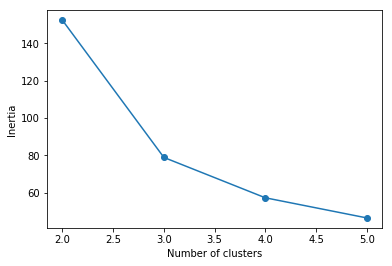

In [ ]:
# Convert the result to a dataframe
pd_inertia = pd.DataFrame({'k_cluster':n_cluster_list, 'inertia':inertias})

# Plot the inertia for evaluation
plt.plot(pd_inertia['k_cluster'], pd_inertia['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

After ploting the elbow curve, the optimal number of cluster k is 3 since the inertia (or cost) decreases the most significantly when k goes from 2 to 3. The decrease in inertia is not significant as we goes further to k = 4, or k= 5. However, any number from 3 to 5 would be a good choice of k; and k = 5 yields the minimum value of the cost function.

To further show the elbow point is the optimum point, we could try larger k.

In [ ]:
n_cluster_list = range(2,11)
inertias = []

for k in n_cluster_list:
    kmean_cluster = KMeans(n_clusters=k).fit(iris_X)
    inertias.append(kmean_cluster.inertia_)
    
    print("### KMean Clustering -- k = {} -- cost = {}".format(k, kmean_cluster.inertia_))

### KMean Clustering -- k = 2 -- cost = 152.34795176035792
### KMean Clustering -- k = 3 -- cost = 78.85144142614601
### KMean Clustering -- k = 4 -- cost = 57.228473214285714
### KMean Clustering -- k = 5 -- cost = 46.44618205128205
### KMean Clustering -- k = 6 -- cost = 39.03998724608725
### KMean Clustering -- k = 7 -- cost = 34.40900974025974
### KMean Clustering -- k = 8 -- cost = 30.063110617452725
### KMean Clustering -- k = 9 -- cost = 28.023494356520672
### KMean Clustering -- k = 10 -- cost = 26.284571412505628


Text(0, 0.5, 'Inertia')

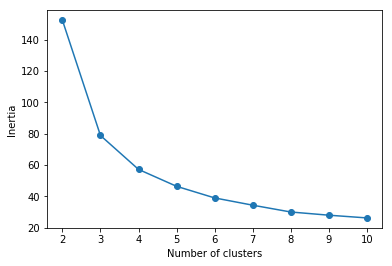

In [ ]:
# Convert the result to a dataframe
pd_inertia = pd.DataFrame({'k_cluster':n_cluster_list, 'inertia':inertias})

# Plot the inertia for evaluation
plt.plot(pd_inertia['k_cluster'], pd_inertia['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Weighted K-means clustering
https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

## Step 1: 

Import all libraries and generate random samples for the exercise. In this case I am creating blobs for the spend share in a year in the two categories and a skewed distribution for the overall yearly spend of the customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans
from pandas import DataFrame
import random
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import skewnorm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


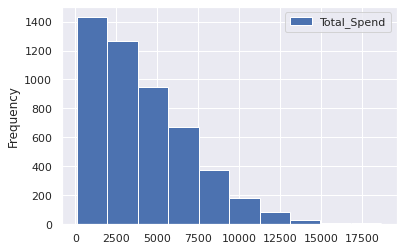

In [ ]:
X, y = make_blobs(n_samples=5000, centers=4, n_features=2, random_state=25)
df = DataFrame(dict(Pct_Spend_in_Organic=(X[:,0])+10, Pct_Spend_in_Local=(X[:,1])+10))
df['Total_Spend']=(skewnorm.rvs(1000,size=5000)*5000)+100
ax=df.reset_index().plot(x='index',y="Total_Spend",kind="hist")

In [ ]:
t1 = skewnorm.rvs(4, size=1000)

(array([ 29., 194., 295., 232., 139.,  73.,  21.,  12.,   3.,   2.]),
 array([-0.64590605, -0.19620216,  0.25350173,  0.70320562,  1.15290952,
         1.60261341,  2.0523173 ,  2.50202119,  2.95172508,  3.40142897,
         3.85113286]),
 <a list of 10 Patch objects>)

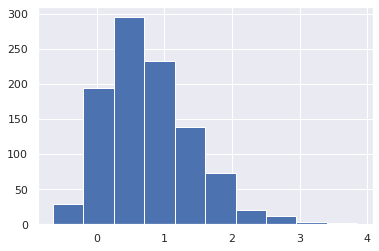

In [ ]:
plt.hist(t1)

In [ ]:
t2 = skewnorm.rvs(-3, size=1000)

(array([  4.,  13.,  41.,  71., 129., 196., 248., 210.,  82.,   6.]),
 array([-3.06256744, -2.66853136, -2.27449528, -1.88045921, -1.48642313,
        -1.09238705, -0.69835097, -0.3043149 ,  0.08972118,  0.48375726,
         0.87779333]),
 <a list of 10 Patch objects>)

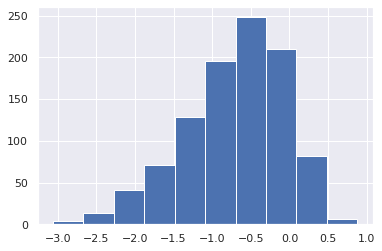

In [ ]:
plt.hist(t2)

## Step 2
Visualize the input data in a scatter plot

Text(0, 0.5, 'Pct Spend in Organic')

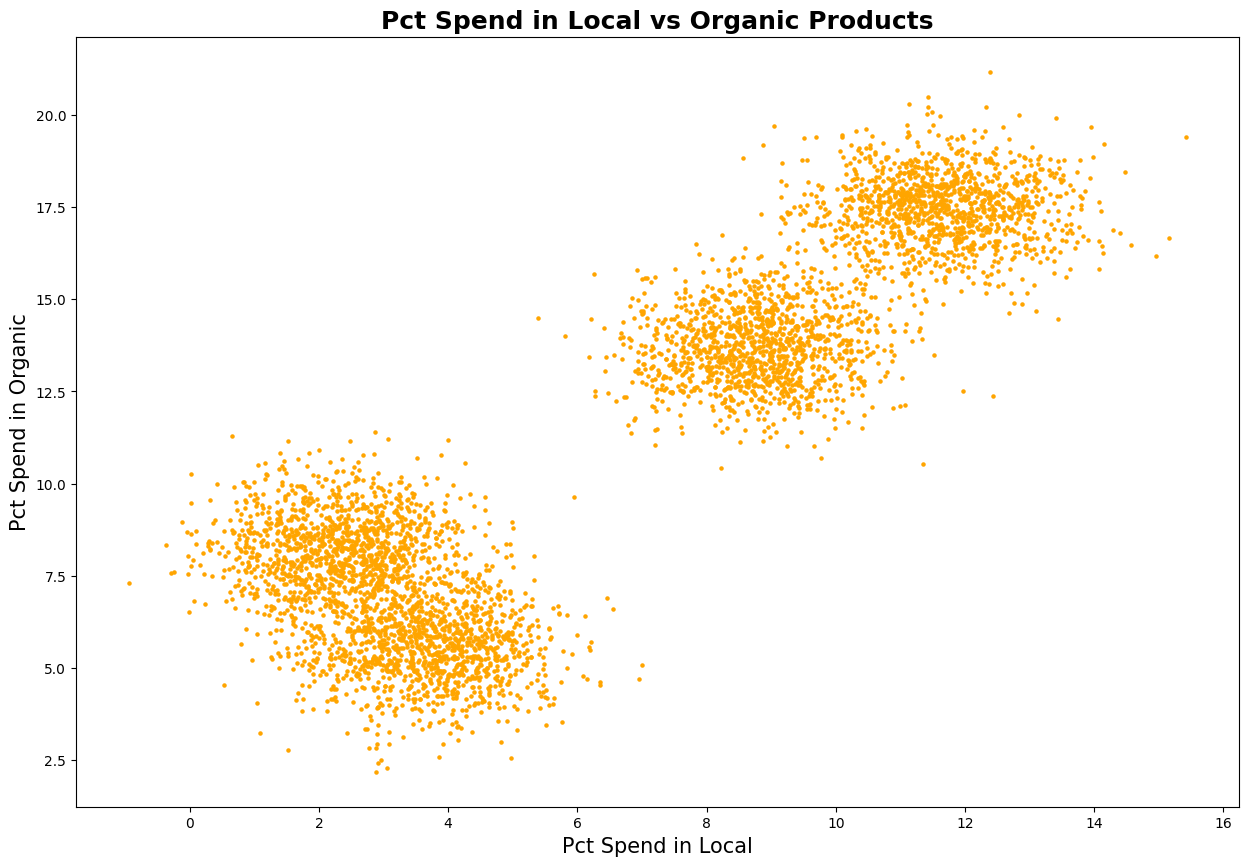

In [ ]:
plt.style.use('default')
x=np.array(df['Pct_Spend_in_Local'])
y=np.array(df['Pct_Spend_in_Organic'])
plt.figure(figsize=(15, 10))
plt.scatter(x, y, s=5, cmap='viridis',c='orange',label='Spend in Organic Products')
plt.title('Pct Spend in Local vs Organic Products',fontsize=18, fontweight='bold')
plt.xlabel('Pct Spend in Local',fontsize=15)
plt.ylabel('Pct Spend in Organic',fontsize=15)

## Step 3


1.   Define K-Means with 1000 maximum iterations
2.   Define an array ‘X’ with the input variables
3.   Define an array ‘Y’ with the column ‘Total_Spend’ as the observational weights



In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000)
X = np.array(df.drop(['Total_Spend'], 1).astype(float))
Y = np.array(df['Total_Spend'].astype(float))



## Step 4
Run the weighted k-means clustering and enter the ‘X’ array as the input and ‘Y’ array as sample weights. Generate the cluster levels for all data points

In [ ]:
wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
predicted_kmeans = kmeans.predict(X, sample_weight = Y)

## Step 5
Visualize the clusters and the centroids in a scatter plot

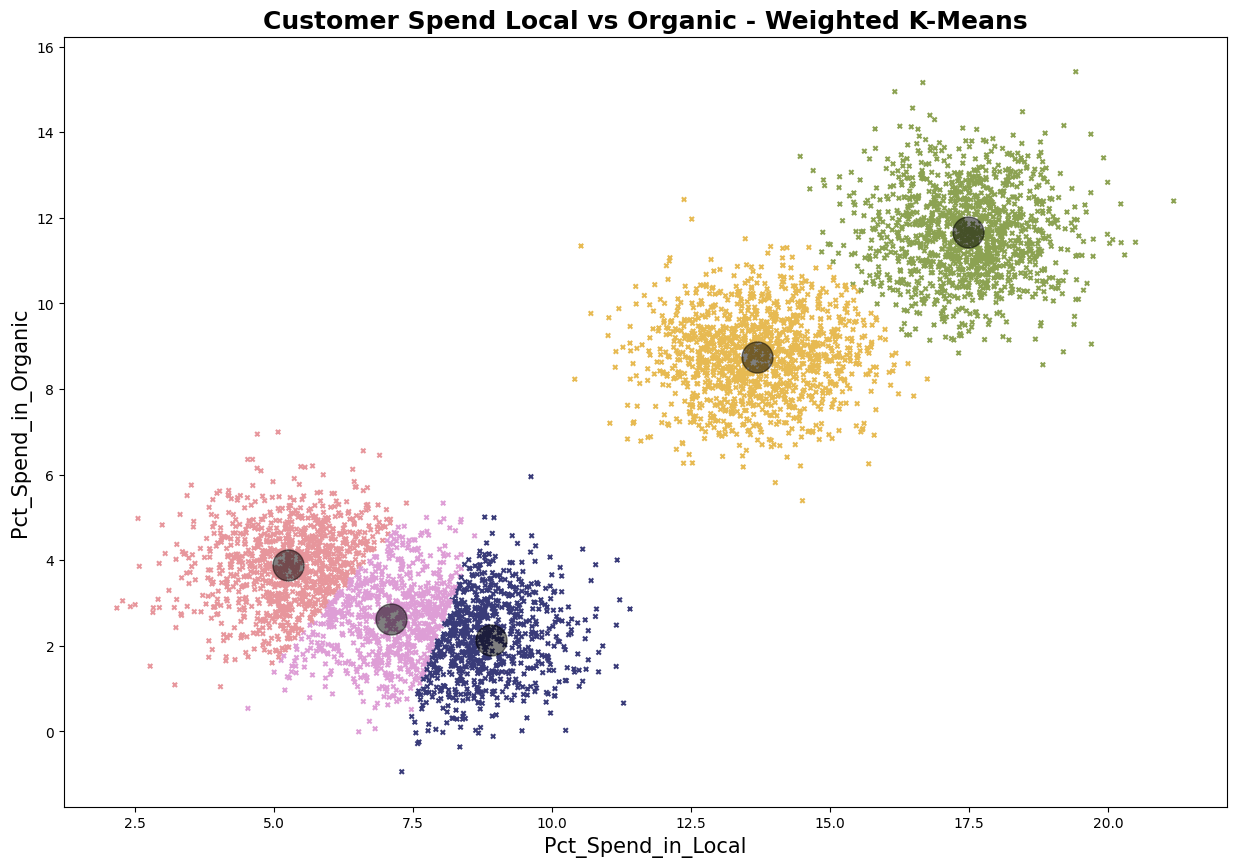

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=wt_kmeansclus.labels_.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer Spend Local vs Organic - Weighted K-Means',fontsize=18, fontweight='bold')
plt.xlabel('Pct_Spend_in_Local',fontsize=15)
plt.ylabel('Pct_Spend_in_Organic',fontsize=15)
centers = wt_kmeansclus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);